# Add Libraries

In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from keras import layers
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from string import punctuation
from nltk.tokenize import word_tokenize

# Read Data and Quick EDA

In [3]:
df = pd.read_csv('bbc-news-data.csv', sep='\t')
df = df.sample(frac=1).reset_index(drop=True)
df

,category,filename,title,content
0,tech,271.txt,US hacker breaks into T-Mobile,A man is facing charges of hacking into compu...
1,entertainment,335.txt,De Niro film leads US box office,Film star Robert De Niro has returned to the ...
2,politics,060.txt,Cardinal criticises Iraq war cost,Billions of pounds spent on conflict in Iraq ...
3,entertainment,369.txt,Briton wins short film Oscar,Three of the five nominees in the live-action...
4,tech,006.txt,Wi-fi web reaches farmers in Peru,"A network of community computer centres, link..."
...,...,...,...,...
2220,tech,164.txt,Who do you think you are?,The real danger is not what happens to your d...
2221,business,053.txt,Weak dollar hits Reuters,Revenues at media group Reuters slipped 11% d...
2222,entertainment,277.txt,The Sound of Music is coming home,The original stage production of The Sound of...
2223,business,243.txt,Making your office work for you,Our mission to brighten up your working lives...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   filename  2225 non-null   object
 2   title     2225 non-null   object
 3   content   2225 non-null   object
dtypes: object(4)
memory usage: 69.7+ KB


In [5]:
df.category.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [6]:
df.isnull().sum()

category    0
filename    0
title       0
content     0
dtype: int64

# Preprocessing Data 
In this section, I deleted punctuations, stopwords and enhanced data for final processing.

In [7]:
translator= str.maketrans('','', punctuation)
stopwords = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz" ]

In [8]:
dataset = pd.DataFrame(columns=['Text', 'Category'])

for index, row in df.iterrows():
    text = row['title'] + ' ' + row['content']
    text = word_tokenize(text)
    text = [x.lower() for x in text ]
    text = [x for x in text if not x in stopwords]
    text = [x.translate(translator) for x in text]

    dataset.loc[index]=({
        'Text' : ' '.join(text),
        'Category' : row['category']
    }) 

In [9]:
dataset['Text'][100]

'parliament s record scandal locked room heart parliament hive scandal  sex  betrayal custody children affair time troubles david blunkett boris johnson  realise westminster divorce den  sprinkled 12 floors archives blowbyblow accounts marital breakups  search s online  1857  england divorce allowed remarriage parliament proving adultery lifethreatening cruelty  legacy testimonies hearings  dating 1670  recorded 325000 items 12 floors parliamentary archives parliament s victoria tower  people researching family history discover tale illicit love  chance  divorce parliament expensive process open rich records include testimony maids  butlers coachmen masters mistresses  records story jane campbell  woman divorce husband  happened 1801 discovered husband  edward addison  committed adultery sister jessy  transcript evidence jessy s maid  amelia laugher  telling addison frequently passed room mistress naked bed  killer blow addison s case  fled abroad pay £5000 damages ordered civil court 

In [10]:
sport=len(dataset[dataset['Category']=='sport'])
business=len(dataset[dataset['Category']=='business'])
politics=len(dataset[dataset['Category']=='politics'])
tech=len(dataset[dataset['Category']=='tech'])
entertainment=len(dataset[dataset['Category']=='entertainment'])
max_len = max(sport, business, politics, tech, entertainment)
max_len

511

# Data Spliting

In [11]:
X = dataset['Text']
Y = dataset['Category']

In [12]:
def prepare_fearture (Y):
    LB = LabelEncoder()
    Y = LB.fit_transform(Y)
    Y = tf.keras.utils.to_categorical(Y)
    return Y
Y = prepare_fearture(dataset['Category'])

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state=4232, shuffle=True, test_size=0.13)
print(len(xtrain))
print(len(xtest))
print(len(ytrain))
print(len(ytest))

1935
290
1935
290


# Tokenization | Converting to word Sequence

In [14]:
Tokenizer = Tokenizer(num_words=10000, oov_token=True)
Tokenizer.fit_on_texts(xtrain)
word_index = Tokenizer.word_index

In [16]:
sequences = Tokenizer.texts_to_sequences(xtrain)
padded = pad_sequences(sequences, maxlen=511,  padding='post')

In [19]:
sequences = Tokenizer.texts_to_sequences(xtest)
padded_test = pad_sequences(sequences, maxlen=511,  padding='post')

In [20]:
padded_test.shape

(290, 511)

# NN Model

In [21]:
model = keras.Sequential([layers.Embedding(10000, 150, input_length=511),
                          
                          layers.GlobalAveragePooling1D(),
                          layers.Dense(128, activation="relu"),
                         layers.Dense(5, activation="softmax")])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 511, 150)          1500000   
                                                                 
 global_average_pooling1d (G  (None, 150)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 128)               19328     
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 1,519,973
Trainable params: 1,519,973
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(padded,
                   ytrain,
                   epochs=100,
                   validation_data = (padded_test, ytest))

Epoch 1/100
61/61 [==============================] - 2s 31ms/step - loss: 1.5786 - accuracy: 0.2961 - val_loss: 1.5389 - val_accuracy: 0.4103
Epoch 2/100
61/61 [==============================] - 2s 31ms/step - loss: 1.3554 - accuracy: 0.6227 - val_loss: 1.0596 - val_accuracy: 0.7276
Epoch 3/100
61/61 [==============================] - 2s 32ms/step - loss: 0.6856 - accuracy: 0.9034 - val_loss: 0.4289 - val_accuracy: 0.9828
Epoch 4/100
61/61 [==============================] - 2s 31ms/step - loss: 0.2551 - accuracy: 0.9809 - val_loss: 0.2037 - val_accuracy: 0.9793
Epoch 5/100
61/61 [==============================] - 2s 31ms/step - loss: 0.1206 - accuracy: 0.9902 - val_loss: 0.1330 - val_accuracy: 0.9931
Epoch 6/100
61/61 [==============================] - 2s 28ms/step - loss: 0.0663 - accuracy: 0.9953 - val_loss: 0.0932 - val_accuracy: 0.9931
Epoch 7/100
61/61 [==============================] - 2s 26ms/step - loss: 0.0414 - accuracy: 0.9974 - val_loss: 0.0774 - val_accuracy: 0.9862
Epoch 

# Evaluation

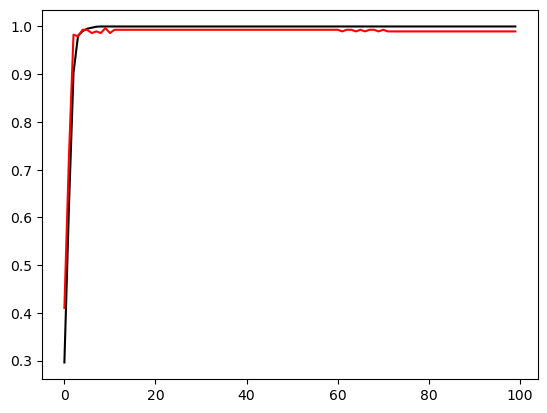

In [24]:
plt.plot(history.history['accuracy'], color='black', label= 'train_data')
plt.plot(history.history['val_accuracy'], color='red', label= 'test_data')